In [128]:
import pandas as pd 
import numpy as np
import seaborn as sns
import missingno as msno

In [129]:
df = pd.read_csv(r'C:\Users\juani\OneDrive\Desktop\PYTHON\myexercises\data\google playstore analysis\Google_Playstore_Apps.csv')

In [130]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Art & Design,2018-06-08,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9745 entries, 0 to 9744
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9745 non-null   int64  
 1   App           9745 non-null   object 
 2   Category      9745 non-null   object 
 3   Rating        8281 non-null   float64
 4   Reviews       9745 non-null   int64  
 5   Installs      9745 non-null   int64  
 6   Type          9744 non-null   object 
 7   Price         9745 non-null   float64
 8   Genres        9745 non-null   object 
 9   Last Updated  9745 non-null   object 
 10  Current Ver   9737 non-null   object 
 11  Android Ver   9743 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 913.7+ KB


In [132]:
#how many null values over there?

<AxesSubplot:>

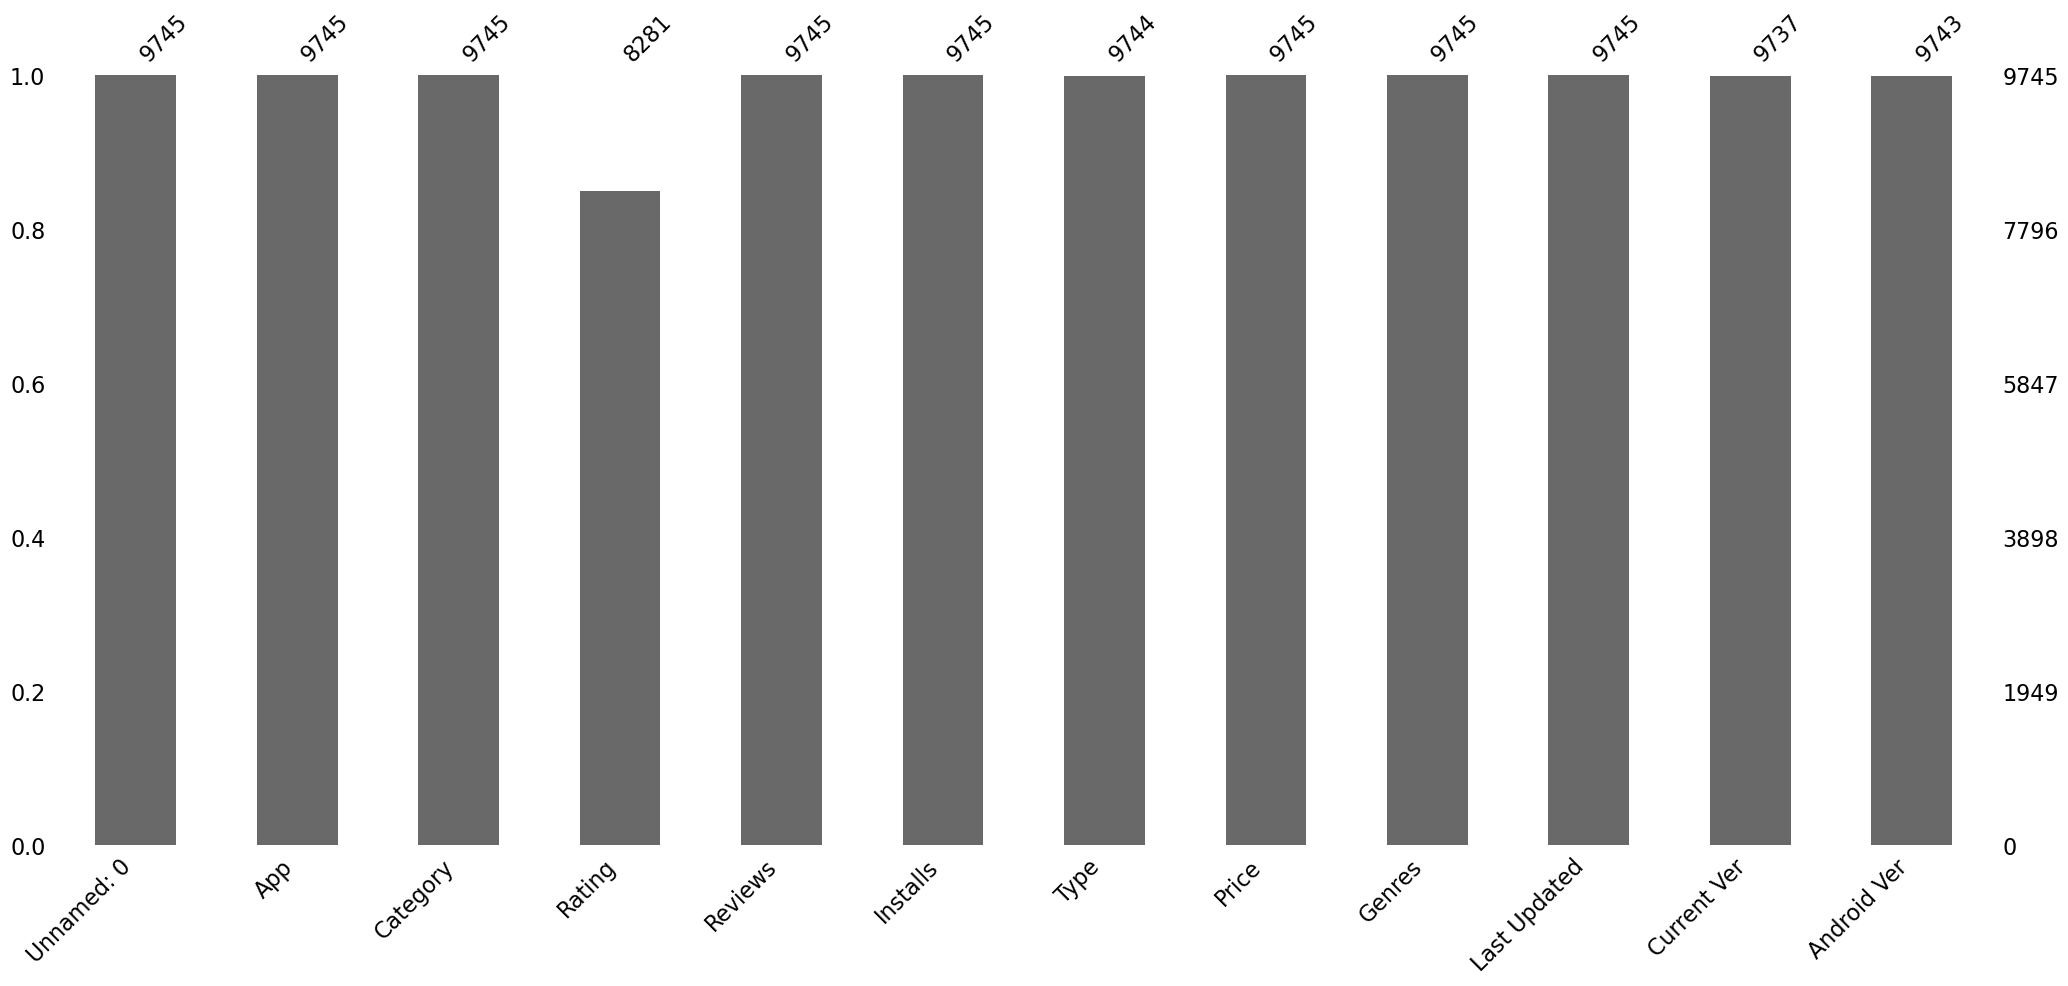

In [133]:

msno.bar(df)

In [134]:
df.isna().sum().sort_values(ascending=False)


Rating          1464
Current Ver        8
Android Ver        2
Type               1
Unnamed: 0         0
App                0
Category           0
Reviews            0
Installs           0
Price              0
Genres             0
Last Updated       0
dtype: int64

In [135]:
# clean the columns that has null 

<AxesSubplot:>

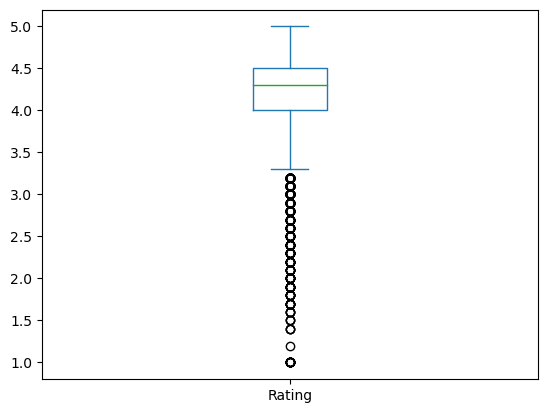

In [136]:
df['Rating'].plot(kind='box')

In [137]:
df['Rating'].describe()

count    8281.000000
mean        4.175088
std         0.534714
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [138]:
mean_avg = df['Rating'].mean()

In [139]:
df['Rating'].fillna(mean_avg, inplace=True) 

In [140]:
#drop the rest of null values since they're just a few

In [141]:
df.dropna(inplace=True)


In [142]:
df.isna().sum().sort_values(ascending=False)

Unnamed: 0      0
App             0
Category        0
Rating          0
Reviews         0
Installs        0
Type            0
Price           0
Genres          0
Last Updated    0
Current Ver     0
Android Ver     0
dtype: int64

In [143]:
#change objtype to datetime 

In [144]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0      2018-01-07
1      2018-01-15
2      2018-08-01
3      2018-06-08
4      2018-06-20
          ...    
9740   2017-07-25
9741   2018-07-06
9742   2017-01-20
9743   2015-01-19
9744   2018-07-25
Name: Last Updated, Length: 9734, dtype: datetime64[ns]

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9734 entries, 0 to 9744
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    9734 non-null   int64         
 1   App           9734 non-null   object        
 2   Category      9734 non-null   object        
 3   Rating        9734 non-null   float64       
 4   Reviews       9734 non-null   int64         
 5   Installs      9734 non-null   int64         
 6   Type          9734 non-null   object        
 7   Price         9734 non-null   float64       
 8   Genres        9734 non-null   object        
 9   Last Updated  9734 non-null   datetime64[ns]
 10  Current Ver   9734 non-null   object        
 11  Android Ver   9734 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 988.6+ KB


In [146]:
##### duplicates values 

In [147]:
df.duplicated(subset=['App'], keep=False).sum()

172

In [148]:
df.loc[df.duplicated(subset=['App'], keep=False)].sort_values(by='App')

,Unnamed: 0,App,Category,Rating,Reviews,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
1378,1675,8 Ball Pool,GAME,4.5,14198297,100000000,Free,0.0,Sports,2018-07-31,4.0.0,4.0.3 and up
3175,3953,8 Ball Pool,SPORTS,4.5,14184910,100000000,Free,0.0,Sports,2018-07-31,4.0.0,4.0.3 and up
754,920,A&E - Watch Full Episodes of TV Shows,ENTERTAINMENT,4.0,29706,1000000,Free,0.0,Entertainment,2018-07-16,3.1.4,4.4 and up
4098,4991,A&E - Watch Full Episodes of TV Shows,FAMILY,4.0,29708,1000000,Free,0.0,Entertainment,2018-07-16,3.1.4,4.4 and up
1498,1843,Angry Birds 2,GAME,4.6,3883589,100000000,Free,0.0,Casual,2018-07-26,2.21.1,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
728,891,YouTube Gaming,ENTERTAINMENT,4.2,130549,5000000,Free,0.0,Entertainment,2018-06-27,2.08.78.2,4.1 and up
696,859,YouTube Kids,ENTERTAINMENT,4.5,470089,50000000,Free,0.0,Entertainment;Music & Video,2018-08-03,3.43.3,4.1 and up
1576,2014,YouTube Kids,FAMILY,4.5,470694,50000000,Free,0.0,Entertainment;Music & Video,2018-08-03,3.43.3,4.1 and up
8577,9635,"busuu: Learn Languages - Spanish, English & More",FAMILY,4.3,207294,10000000,Free,0.0,Education,2018-08-01,13.9.0.161,5.0 and up


In [149]:
#df_copy_before_removing_duplicates = df.copy()

In [ ]:
# keep the values with most reviews

In [150]:
df.sort_values(by=['App', 'Reviews'], inplace=True)

In [151]:
df.drop_duplicates(subset=["App"], inplace=True, keep='last')

In [152]:
df.duplicated(subset=['App'], keep=False).sum()

0

In [ ]:
###format the Category column

In [158]:
df['Category'].value_counts()

Family                 1874
Game                    945
Tools                   827
Business                420
Medical                 395
Productivity            374
Personalization         374
Lifestyle               369
Finance                 345
Sports                  325
Communication           315
Health and fitness      288
Photography             281
News and magazines      254
Social                  239
Books and reference     221
Travel and local        219
Shopping                202
Dating                  170
Video players           164
Maps and navigation     131
Food and drink          112
Education               105
Entertainment            86
Auto and vehicles        85
Libraries and demo       83
Weather                  79
House and home           73
Events                   64
Art and design           60
Parenting                60
Comics                   56
Beauty                   53
Name: Category, dtype: int64

In [154]:
df['Category'] = df['Category'].str.replace('_', ' ')

In [156]:
df['Category'] = df['Category'].str.capitalize()

Family                 1874
Game                    945
Tools                   827
Business                420
Medical                 395
Productivity            374
Personalization         374
Lifestyle               369
Finance                 345
Sports                  325
Communication           315
Health and fitness      288
Photography             281
News and magazines      254
Social                  239
Books and reference     221
Travel and local        219
Shopping                202
Dating                  170
Video players           164
Maps and navigation     131
Food and drink          112
Education               105
Entertainment            86
Auto and vehicles        85
Libraries and demo       83
Weather                  79
House and home           73
Events                   64
Art and design           60
Parenting                60
Comics                   56
Beauty                   53
Name: Category, dtype: int64

In [180]:
## Create an auxiliary column 'Distribution' to determine wether an app is Free/Paid

In [177]:
df['Distribution'] = 'Free'

In [178]:
df.loc[df['Price'] > 0, 'Distribution'] = 'Paid'

,Unnamed: 0,App,Category,Rating,Reviews,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver,Distribution
7843,8884,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.175088,27,500,Free,0.00,Sports,2017-10-07,0.22,4.1 and up,Free
7514,8532,+Download 4 Instagram Twitter,Social,4.500000,40467,1000000,Free,0.00,Social,2018-08-02,5.03,4.1 and up,Free
288,324,- Free Comics - Comic Apps,Comics,3.500000,115,10000,Free,0.00,Comics,2018-07-13,5.0.12,5.0 and up,Free
3683,4541,.R,Tools,4.500000,259,10000,Free,0.00,Tools,2014-09-16,1.1.06,1.5 and up,Free
3770,4636,/u/app,Communication,4.700000,573,10000,Free,0.00,Communication,2018-07-03,4.2.4,4.1 and up,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388,6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",Video players,4.175088,414,100000,Free,0.00,Video Players & Editors,2018-07-18,4.0.7,4.0.3 and up,Free
3513,4362,💎 I'm rich,Lifestyle,3.800000,718,10000,Paid,399.99,Lifestyle,2018-03-11,1.0.0,4.4 and up,Paid
2056,2575,"💘 WhatsLov: Smileys of love, stickers and GIF",Social,4.600000,22098,1000000,Free,0.00,Social,2018-07-24,4.2.4,4.0.3 and up,Free
6571,7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,Tools,4.000000,19,10000,Free,0.00,Tools,2017-10-21,1.0,4.2 and up,Free


In [181]:
##analysis


In [182]:
#Which company has the most reviews?

In [188]:
df.sort_values(by= 'Reviews', ascending=False).head(1)

,Unnamed: 0,App,Category,Rating,Reviews,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver,Distribution
2025,2544,Facebook,Social,4.1,78158306,1000000000,Free,0.0,Social,2018-08-03,Varies with device,Varies with device,Free


In [ ]:
##Which category has the most downloads

In [194]:
df['Category'].value_counts()

Family                 1874
Game                    945
Tools                   827
Business                420
Medical                 395
Productivity            374
Personalization         374
Lifestyle               369
Finance                 345
Sports                  325
Communication           315
Health and fitness      288
Photography             281
News and magazines      254
Social                  239
Books and reference     221
Travel and local        219
Shopping                202
Dating                  170
Video players           164
Maps and navigation     131
Food and drink          112
Education               105
Entertainment            86
Auto and vehicles        85
Libraries and demo       83
Weather                  79
House and home           73
Events                   64
Art and design           60
Parenting                60
Comics                   56
Beauty                   53
Name: Category, dtype: int64

In [195]:
#to which category belongs the most expensive apps

In [197]:
df.sort_values(by='Price', ascending=False).head()

,Unnamed: 0,App,Category,Rating,Reviews,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver,Distribution
3517,4367,I'm Rich - Trump Edition,Lifestyle,3.6,275,10000,Paid,400.00,Lifestyle,2018-05-03,1.0.1,4.1 and up,Paid
4457,5358,I am Rich!,Finance,3.8,93,1000,Paid,399.99,Finance,2017-12-11,1.0,4.1 and up,Paid
4455,5356,I Am Rich Premium,Finance,4.1,1867,50000,Paid,399.99,Finance,2017-11-12,1.6,4.0 and up,Paid
4461,5362,I Am Rich Pro,Family,4.4,201,5000,Paid,399.99,Entertainment,2017-05-30,1.54,1.6 and up,Paid
3370,4197,most expensive app (H),Family,4.3,6,100,Paid,399.99,Entertainment,2018-07-16,1.0,7.0 and up,Paid


In [198]:
##whats the name of the most expensive game?

In [204]:
df.query("Category == 'Game'").sort_values(by=['Price'],ascending=False).head(3)

,Unnamed: 0,App,Category,Rating,Reviews,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver,Distribution
3376,4203,The World Ends With You,Game,4.6,4108,10000,Paid,17.99,Arcade,2015-12-14,1.0.4,4.0 and up,Paid
9686,10782,Trine 2: Complete Story,Game,3.8,252,10000,Paid,16.99,Action,2015-02-27,2.22,5.0 and up,Paid
5395,6341,Blackjack Verite Drills,Game,4.6,17,100,Paid,14.00,Casino,2017-07-09,1.1.10,3.0 and up,Paid


In [205]:
##most popular finance app

In [206]:
df.query("Category == 'Finance'").sort_values(by=['Price'],ascending=False).head(2)

,Unnamed: 0,App,Category,Rating,Reviews,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver,Distribution
4463,5364,I am rich (Most expensive app),Finance,4.1,129,1000,Paid,399.99,Finance,2017-12-06,2,4.0.3 and up,Paid
4472,5373,I AM RICH PRO PLUS,Finance,4.0,36,1000,Paid,399.99,Finance,2018-06-25,1.0.2,4.1 and up,Paid


In [207]:
##which free game has the greatest number of reviews

In [208]:
df.query("Category == 'Game' and Price == 0").sort_values(by=['Reviews'],ascending=False).head(2)

,Unnamed: 0,App,Category,Rating,Reviews,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver,Distribution
1373,1670,Clash of Clans,Game,4.6,44891723,100000000,Free,0.0,Strategy,2018-07-15,10.322.16,4.1 and up,Free
1357,1654,Subway Surfers,Game,4.5,27722264,1000000000,Free,0.0,Arcade,2018-07-12,1.90.0,4.1 and up,Free
